In [ ]:
! pip install -q kaggle

from google.colab import files
files.upload() 

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kabirsharma007","key":"b165f842c20ac6ac1928295583fb4513"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

100% 2.69G/2.70G [00:41<00:00, 47.3MB/s]
100% 2.70G/2.70G [00:41<00:00, 70.0MB/s]


In [ ]:
! unzip new-plant-diseases-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_path = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [ ]:

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = (glob('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/*'))
len(folders)

38

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
validation_set = test_datagen.flow_from_directory('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=validation_set,
  epochs=25,
  steps_per_epoch=276,
  validation_steps=276
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
276/276 [==============================] - 162s 463ms/step - loss: 5.7653 - accuracy: 0.6021 - val_loss: 3.0643 - val_accuracy: 0.7605
Epoch 2/25
276/276 [==============================] - 129s 467ms/step - loss: 3.5165 - accuracy: 0.7574 - val_loss: 2.6082 - val_accuracy: 0.8003
Epoch 3/25
276/276 [==============================] - 126s 458ms/step - loss: 3.2950 - accuracy: 0.7859 - val_loss: 2.8414 - val_accuracy: 0.8158
Epoch 4/25
276/276 [==============================] - 128s 466ms/step - loss: 3.3515 - accuracy: 0.8089 - val_loss: 3.6452 - val_accuracy: 0.8079
Epoch 5/25
276/276 [==============================] - 127s 459ms/step - loss: 3.2949 - accuracy: 0.8239 - val_loss: 4.0720 - val_accuracy: 0.8145
Epoch 6/25
276/276 [==============================] - 126s 458ms/step - loss: 3.1220 - accuracy: 0.8384 - val_loss: 2.7017 - val_accuracy: 0.8516
Epoch 7/25
276/276 [==============================] - 126s 458ms/step - loss: 3.5128 - accuracy: 0.8339 - val_loss: 3.4605 -

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [ ]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('model_inception.h5')

In [ ]:
final_acc = model.evaluate(validation_set)[1]
print(f"Final accuracy of model is = {final_acc*100}% ")

In [ ]:
 dict(zip (list(training_set.class_indices.values()), list(training_set.class_indices.keys()) ))

In [ ]:
ref = dict(zip (list(training_set.class_indices.values()), list(training_set.class_indices.keys()) ))

In [ ]:
def predict_disease(path):
  img =image.load_img(path ,target_size=(224,224))
  plt.imshow(img)
  i = image.img_to_array(img)
  im = preprocess_input(i)
  img = np.expand_dims(im, axis=0)
  pred = np.argmax(model.predict(img))
  print(f"The disease is {ref[pred]}")

The disease is Tomato___healthy


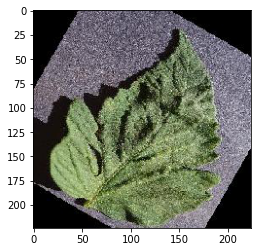

In [ ]:
predict_disease('/content/test/test/TomatoHealthy3.JPG')